In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
# Any results you write to the current directory are saved as output.

In [1]:
# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

/kaggle/input/nyc_benchmarking_disclosure_2017_consumption_data.xlsx


In [2]:
data = pd.read_excel('/kaggle/input/nyc_benchmarking_disclosure_2017_consumption_data.xlsx','Information and Metrics')
data.head()
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 60 columns):
Order                                                         34355 non-null int64
Property Id                                                   34355 non-null int64
Property Name                                                 34355 non-null object
Parent Property Id                                            1723 non-null object
Parent Property Name                                          1723 non-null object
BBL - 10 digits                                               33625 non-null float64
NYC Borough, Block and Lot (BBL) self-reported                33626 non-null object
NYC Building Identification Number (BIN)                      33123 non-null object
Address 1 (self-reported)                                     34355 non-null object
Address 2 (self-reported)                                     427 non-null object
Postal Code                                             

In [3]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

In [4]:
# Statistics for each column
data.describe()

,Order,Property Id,BBL - 10 digits,Self-Reported Gross Floor Area (ft²),Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,ENERGY STAR Score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),Propane Use (kBtu),District Steam Use (kBtu),District Hot Water Use (kBtu),District Chilled Water Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Annual Maximum Demand (kW),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²)
count,34355.000000,3.435500e+04,3.362500e+04,3.435500e+04,3.432300e+04,7226.000000,2450.000000,34355.000000,34355.000000,34355.000000,25454.000000,3.188800e+04,2.856000e+04,3.188800e+04,2.856000e+04,31001.000000,28042.000000,3.600000e+01,5.664000e+03,2.378000e+03,4.840000e+02,7.000000e+01,1.0,1.568000e+03,8.000000e+00,3.000000e+01,2.881900e+04,2.804700e+04,3.157600e+04,3.157600e+04,3.101300e+04,2.383000e+03,3.295700e+04,3.311600e+04,3.308800e+04,1.828000e+04,1.827100e+04
mean,17355.145103,4.710374e+06,2.249470e+09,1.149392e+05,1.115422e+05,20136.231746,11179.502776,1946.106855,1.196565,98.393101,53.927163,1.265785e+03,1.393057e+03,9.922633e+02,1.094395e+03,15.869072,1.154839,1.653033e+06,2.523975e+06,5.136646e+06,3.145131e+06,9.300335e+05,11919336.1,5.349684e+09,1.014108e+08,6.269823e+07,3.468667e+07,3.576895e+05,3.833599e+06,1.123563e+06,1.126104e+06,2.635069e+03,1.893548e+04,1.665273e+03,1.719766e+04,9.964984e+03,5.869470e+02
std,10016.661222,1.676669e+06,1.193104e+09,2.164591e+05,2.108989e+05,51022.113092,24105.730990,32.725881,2.959191,8.917131,32.573629,1.626921e+05,1.719455e+05,1.349948e+05,1.426694e+05,946.687948,58.542330,1.809641e+06,4.500459e+06,4.704320e+06,4.320395e+06,1.924976e+06,NaN,2.036540e+11,1.219380e+08,1.122653e+08,3.272735e+09,3.329299e+07,1.249719e+07,3.662716e+06,3.674892e+06,5.617472e+04,2.954070e+06,1.621715e+05,2.943758e+06,9.190300e+04,5.251308e+04
min,1.000000,7.365000e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,1051.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,11919336.1,-3.833694e+08,2.507188e+06,1.082000e+04,0.000000e+00,0.000000e+00,-6.343300e+03,-1.859100e+03,-1.859100e+03,0.000000e+00,0.000000e+00,0.000000e+00,-1.760050e+04,0.000000e+00,0.000000e+00
25%,8666.500000,2.825644e+06,1.014980e+09,4.227300e+04,4.175000e+04,3500.000000,1899.000000,1925.000000,1.000000,100.000000,25.000000,9.350000e+01,9.750000e+01,5.800000e+01,6.060000e+01,3.800000,0.100000,1.998125e+05,2.209035e+05,2.836561e+06,6.749850e+04,0.000000e+00,11919336.1,4.044238e+06,2.507188e+06,1.570166e+06,8.169667e+05,8.581150e+03,6.888429e+05,2.018883e+05,2.022287e+05,4.560000e+01,1.841000e+02,6.040000e+01,5.380000e+01,1.954200e+03,2.847000e+01
50%,17383.000000,4.897531e+06,2.032480e+09,6.582000e+04,6.438100e+04,8000.000000,5000.000000,1935.000000,1.000000,100.000000,56.000000,1.224000e+02,1.276000e+02,7.990000e+01,8.380000e+01,5.300000,0.500000,3.693091e+05,1.226102e+06,4.176257e+06,1.790936e+06,2.357089e+05,11919336.1,1.063606e+07,3.106487e+07,1.250233e+07,3.001860e+06,3.226560e+04,1.249026e+06,3.660686e+05,3.673331e+05,1.760000e+02,3.283000e+02,1.888000e+02,1.024000e+02,3.794200e+03,5.003000e+01
75%,26028.500000,6.297280e+06,3.058740e+09,1.

In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.


,Missing Values,% of Total Values
Propane Use (kBtu),34354,100.0
District Hot Water Use (kBtu),34347,100.0
District Chilled Water Use (kBtu),34325,99.9
Fuel Oil #1 Use (kBtu),34319,99.9
Diesel #2 Use (kBtu),34285,99.8
Address 2 (self-reported),33928,98.8
Fuel Oil #5 & 6 Use (kBtu),33871,98.6
District Steam Use (kBtu),32787,95.4
Parent Property Name,32632,95.0
Parent Property Id,32632,95.0


In [7]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 43 columns that have missing values.
We will remove 19 columns.


In [8]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

# For older versions of pandas (https://github.com/pandas-dev/pandas/issues/19078)
# data = data.drop(list(missing_columns), axis = 1)

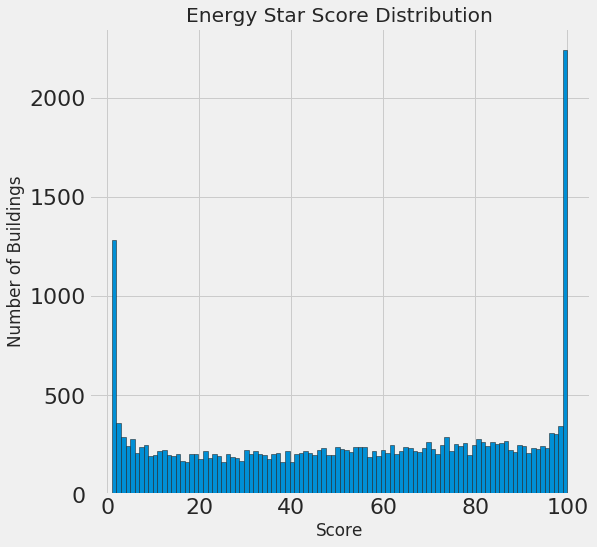

In [9]:
figsize(8, 8)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

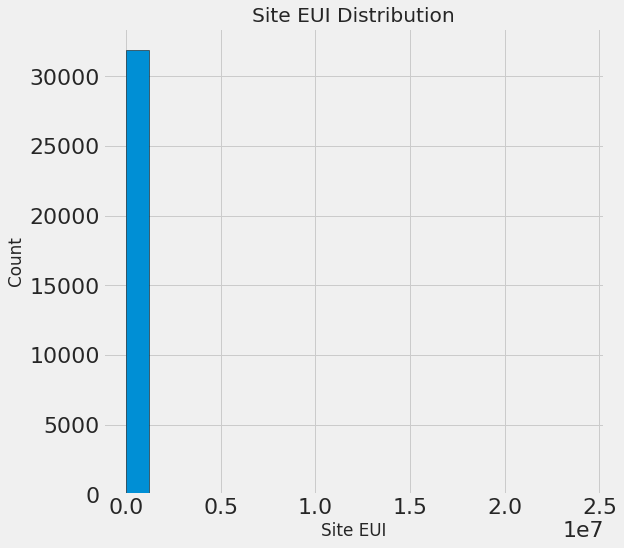

In [10]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [11]:
data['Site EUI (kBtu/ft²)'].describe()

count    3.188800e+04
mean     9.922633e+02
std      1.349948e+05
min      0.000000e+00
25%      5.800000e+01
50%      7.990000e+01
75%      1.034000e+02
max      2.405806e+07
Name: Site EUI (kBtu/ft²), dtype: float64

In [12]:
data.loc[data['Site EUI (kBtu/ft²)'] == 860, :]

,Order,Property Id,Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area (ft²),Self-Reported Gross Floor Area (ft²),Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings,Occupancy,Metered Areas (Energy),score,Source EUI (kBtu/ft²),Weather Normalized Source EUI (kBtu/ft²),Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Electricity Use - Grid Purchase (kWh),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status


In [13]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

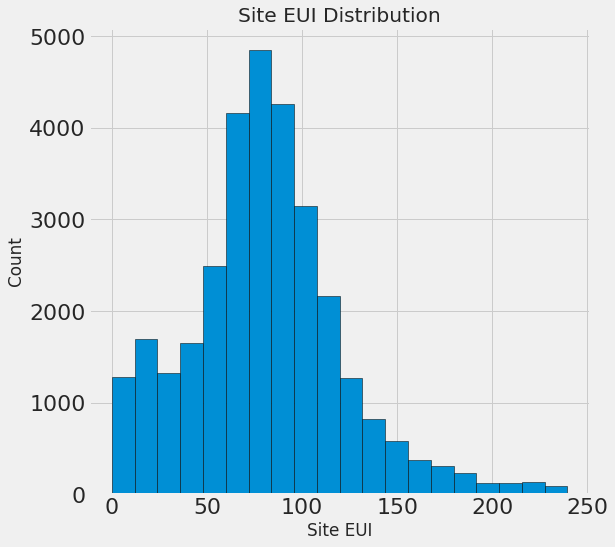

In [14]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [15]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

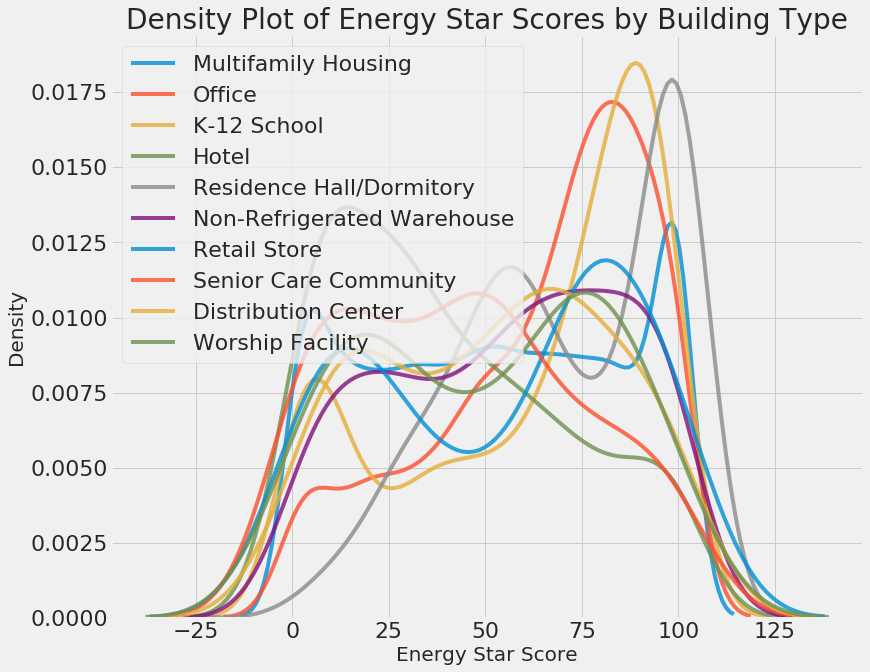

In [16]:
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

In [17]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

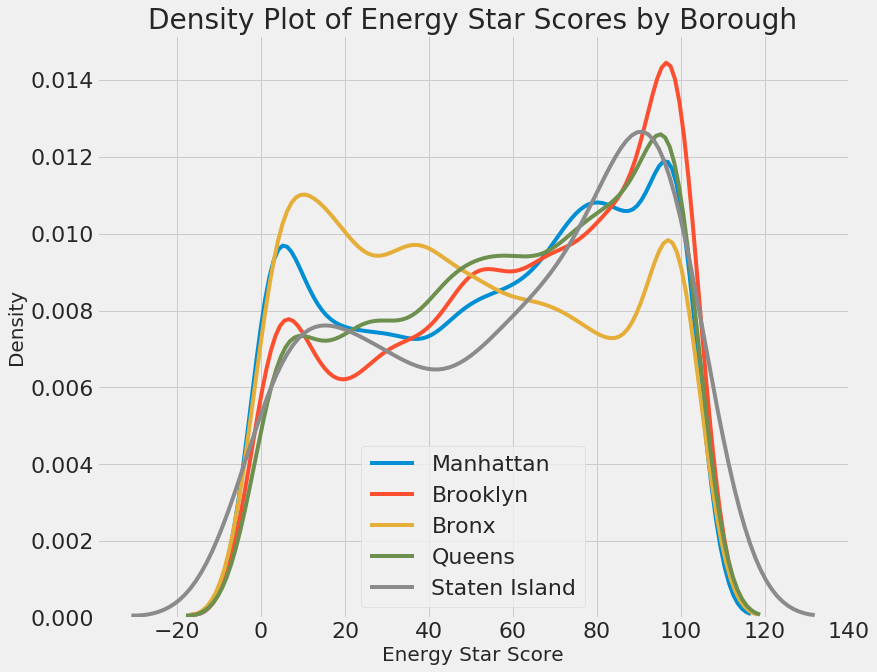

In [18]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

In [19]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.764947
Weather Normalized Site EUI (kBtu/ft²)                       -0.759865
Weather Normalized Source EUI (kBtu/ft²)                     -0.676350
Source EUI (kBtu/ft²)                                        -0.664716
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.477838
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.349015
Property Id                                                  -0.138856
Order                                                        -0.098902
Direct GHG Emissions (Metric Tons CO2e)                      -0.094196
Weather Normalized Site Natural Gas Use (therms)             -0.080714
Natural Gas Use (kBtu)                                       -0.079888
Total GHG Emissions (Metric Tons CO2e)                       -0.068426
Occupancy                                                    -0.048963
Electricity Use - Grid Purchase (kWh)                        -0.018676
Electr

In [20]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                               -0.764947
Weather Normalized Site EUI (kBtu/ft²)                            -0.759865
sqrt_Site EUI (kBtu/ft²)                                          -0.754405
sqrt_Weather Normalized Site EUI (kBtu/ft²)                       -0.748839
sqrt_Weather Normalized Source EUI (kBtu/ft²)                     -0.716912
sqrt_Source EUI (kBtu/ft²)                                        -0.709354
Weather Normalized Source EUI (kBtu/ft²)                          -0.676350
Source EUI (kBtu/ft²)                                             -0.664716
log_Site EUI (kBtu/ft²)                                           -0.663572
log_Weather Normalized Site EUI (kBtu/ft²)                        -0.657328
log_Weather Normalized Source EUI (kBtu/ft²)                      -0.650812
log_Source EUI (kBtu/ft²)                                         -0.648899
Weather Normalized Site Natural Gas Intensity (therms/ft²)        -0.477838
sqrt_Weather

In [22]:
# Display most positive correlations
correlations.tail(15)

log_BBL - 10 digits                                                0.037525
Largest Property Use Type_Hospital (General Medical & Surgical)    0.044757
sqrt_BBL - 10 digits                                               0.049665
BBL - 10 digits                                                    0.054764
Largest Property Use Type_K-12 School                              0.058834
Self-Reported Gross Floor Area (ft²)                               0.066285
Borough_Brooklyn                                                   0.066885
Largest Property Use Type_Residence Hall/Dormitory                 0.067337
Largest Property Use Type - Gross Floor Area (ft²)                 0.068612
Largest Property Use Type_Office                                   0.097753
sqrt_Self-Reported Gross Floor Area (ft²)                          0.104654
sqrt_Largest Property Use Type - Gross Floor Area (ft²)            0.108566
log_Self-Reported Gross Floor Area (ft²)                           0.133142
log_Largest 

/opt/conda/lib/python3.6/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


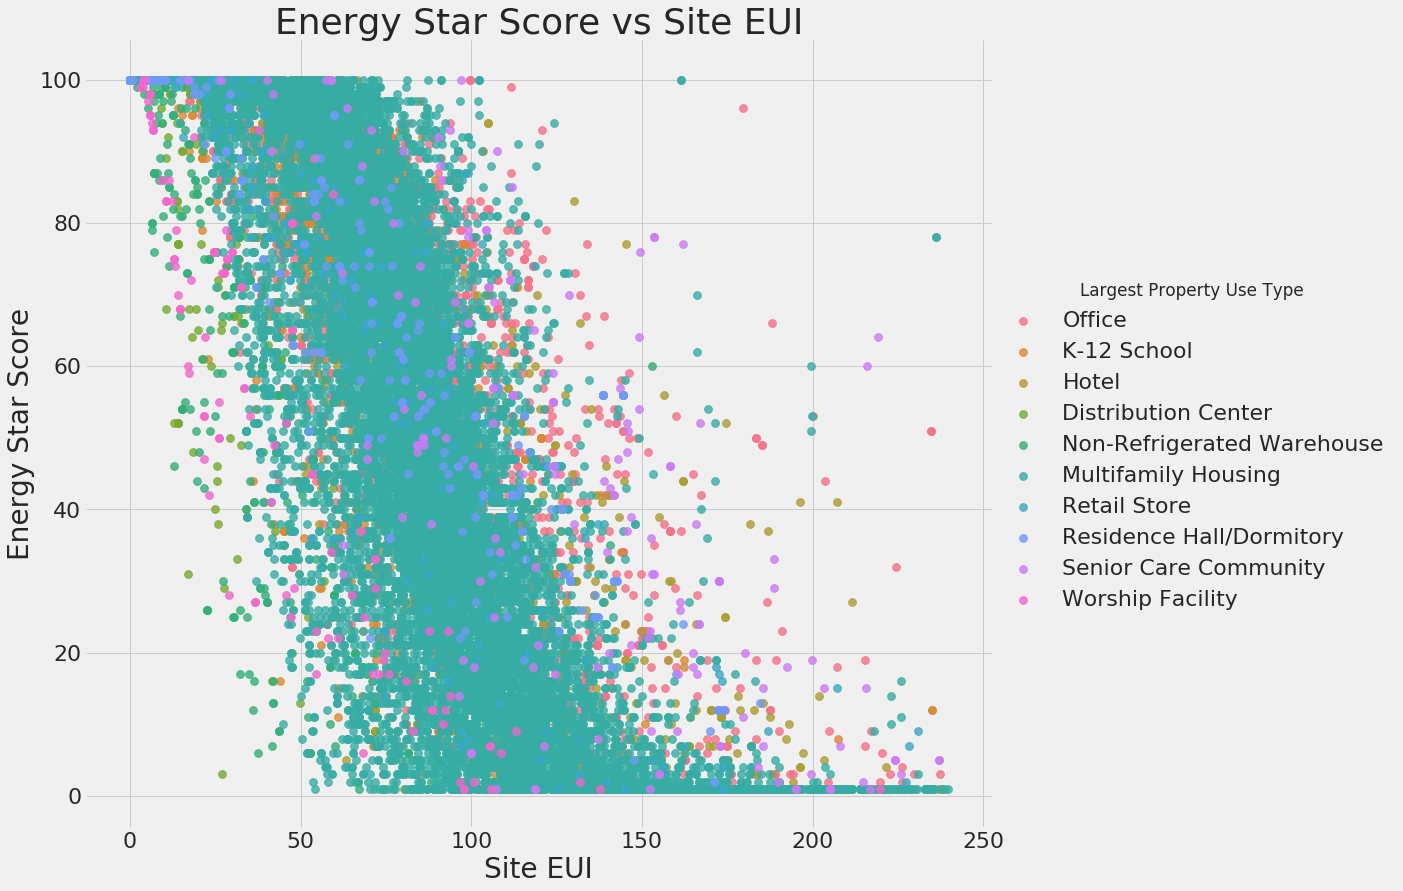

In [23]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


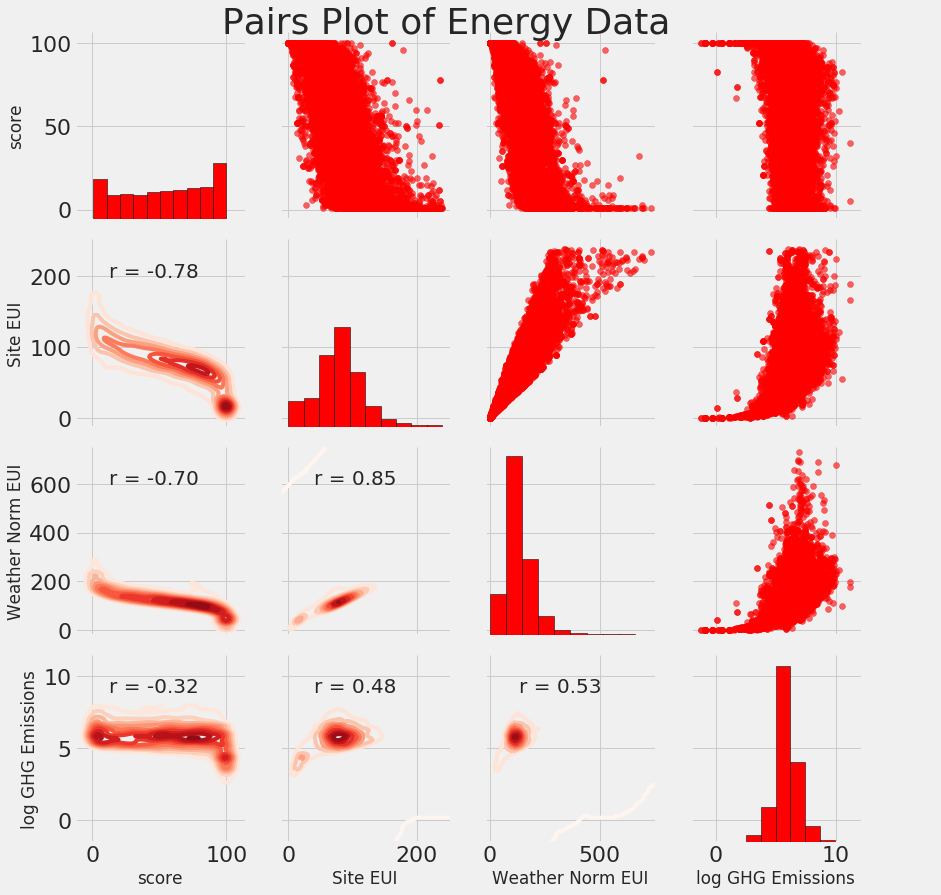

In [24]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

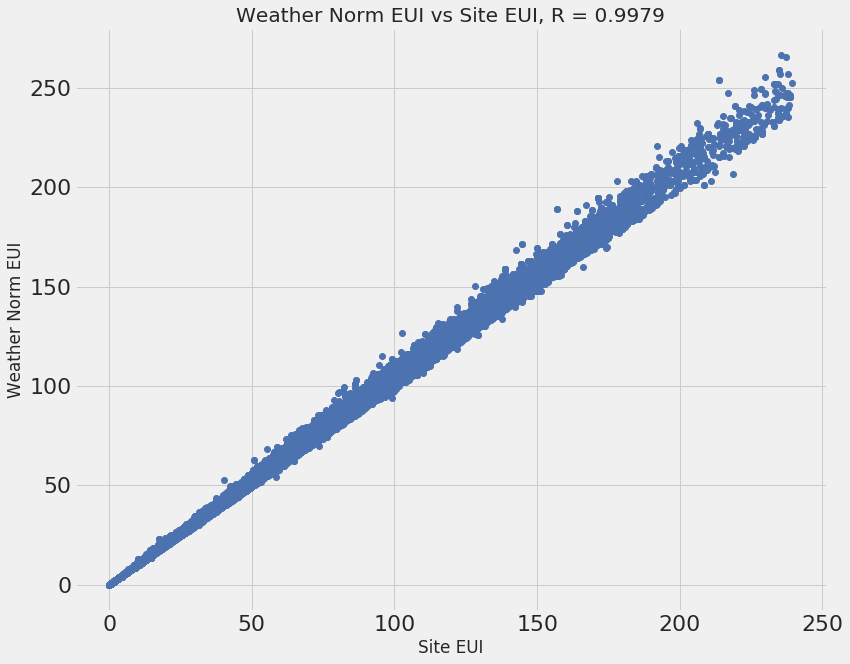

In [25]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);

In [26]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [27]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

KeyError: "['Weather Normalized Site EUI (kBtu/ft²)'] not found in axis"

In [28]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(24706, 151)

In [29]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(0, 151)
(24706, 151)


In [30]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(17294, 150)
(7412, 150)
(17294, 1)
(7412, 1)


In [31]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [32]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 56.00
Baseline Performance on the test set: MAE = 28.0094


In [33]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)